<a href="https://colab.research.google.com/github/feliciacia/Data-Science/blob/main/Copy_of_Copy_of_Catboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Final Project

In [ ]:
pip install catboost

     |████████████████████████████████| 76.1 MB 1.3 MB/s 


In [ ]:
import pandas as pd
import catboost as cat
from catboost import CatBoostClassifier


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
submission = pd.read_csv('/content/gdrive/My Drive/DS_FINAL_CSV/submission_format.csv')


In [ ]:
train_values = pd.read_csv('/content/gdrive/My Drive/DS_FINAL_CSV/train_values.csv')
train_labels = pd.read_csv('/content/gdrive/My Drive/DS_FINAL_CSV/train_labels.csv')
test_values = pd.read_csv('/content/gdrive/My Drive/DS_FINAL_CSV/test_values.csv')
train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
lsct = []
lsco = []
lscn = []
for i in range(len(train_values)):
  if(train_values["land_surface_condition"][i]=="t"): 
    lsct.append(1)
    lsco.append(0)
    lscn.append(0)
  elif(train_values["land_surface_condition"][i]=="o"):
    lsct.append(0)
    lsco.append(1)
    lscn.append(0)
  elif(train_values["land_surface_condition"][i]=="n"):
    lsct.append(0)
    lsco.append(0)
    lscn.append(1)

In [ ]:
train_values = train_values.drop("land_surface_condition",axis=1)
train_values["lsct"]=lsct
train_values["lsco"]=lsco
train_values["lscn"]=lscn

In [ ]:
fth = []
fti = []
ftr = []
ftu = []
ftw = []
for i in range(len(train_values)):
  if(train_values["foundation_type"][i]=="h"):
    fth.append(1)
    fti.append(0)
    ftr.append(0)
    ftu.append(0)
    ftw.append(0)
  elif(train_values["foundation_type"][i]=="i"):
    fth.append(0)
    fti.append(1)
    ftr.append(0)
    ftu.append(0)
    ftw.append(0)
  elif(train_values["foundation_type"][i]=="r"):
    fth.append(0)
    fti.append(0)
    ftr.append(1)
    ftu.append(0)
    ftw.append(0)
  elif(train_values["foundation_type"][i]=="u"):
    fth.append(0)
    fti.append(0)
    ftr.append(0)
    ftu.append(1)
    ftw.append(0)
  elif(train_values["foundation_type"][i]=="W"):
    fth.append(0)
    fti.append(0)
    ftr.append(0)
    ftu.append(0)
    ftw.append(1)
  else:
    fth.append(0)
    fti.append(0)
    ftr.append(0)
    ftu.append(0)
    ftw.append(0)

In [ ]:
train_values = train_values.drop("foundation_type",axis=1)
train_values["fth"]=fth
train_values["fti"]=fti
train_values["ftr"]=ftr
train_values["ftu"]=ftu
train_values["ftw"]=ftw

In [ ]:
rtn = []
rtq = []
rtX = []
for i in range(len(train_values)):
  if(train_values["roof_type"][i]=="n"):
    rtn.append(1)
    rtq.append(0)
    rtX.append(0)
  elif(train_values["roof_type"][i]=="q"):
    rtn.append(0)
    rtq.append(1)
    rtX.append(0)
  elif(train_values["roof_type"][i]=="X"):
    rtn.append(0)
    rtq.append(0)
    rtX.append(1)
  else:
    rtn.append(0)
    rtq.append(0)
    rtX.append(0)

In [ ]:
train_values = train_values.drop("roof_type",axis=1)
train_values["rtn"]=rtn
train_values["rtq"]=rtq
train_values["rtX"]=rtX

In [ ]:
gftf = []
gftm = []
gftv = []
gftx = []
gftz = []
for i in range(len(train_values)):
  if(train_values["ground_floor_type"][i]=="f"):
    gftf.append(1)
    gftm.append(0)
    gftv.append(0)
    gftx.append(0)
    gftz.append(0)
  elif(train_values["ground_floor_type"][i]=="m"):
    gftf.append(0)
    gftm.append(1)
    gftv.append(0)
    gftx.append(0)
    gftz.append(0)
  elif(train_values["ground_floor_type"][i]=="v"):
    gftf.append(0)
    gftm.append(0)
    gftv.append(1)
    gftx.append(0)
    gftz.append(0)
  elif(train_values["ground_floor_type"][i]=="x"):
    gftf.append(0)
    gftm.append(0)
    gftv.append(0)
    gftx.append(1)
    gftz.append(0)
  elif(train_values["ground_floor_type"][i]=="z"):
    gftf.append(0)
    gftm.append(0)
    gftv.append(0)
    gftx.append(0)
    gftz.append(1)
  else:
    gftf.append(0)
    gftm.append(0)
    gftv.append(0)
    gftx.append(0)
    gftz.append(0)

In [ ]:
train_values = train_values.drop("ground_floor_type",axis=1)
train_values["gftf"]=gftf
train_values["gftm"]=gftm
train_values["gftv"]=gftv
train_values["gftx"]=gftx
train_values["gftz"]=gftz

In [ ]:
oftj = []
oftq = []
ofts = []
oftx = []
for i in range(len(train_values)):
  if(train_values["other_floor_type"][i]=="j"):
    oftj.append(1)
    oftq.append(0)
    ofts.append(0)
    oftx.append(0)
  elif(train_values["other_floor_type"][i]=="q"):
    oftj.append(0)
    oftq.append(1)
    ofts.append(0)
    oftx.append(0)
  elif(train_values["other_floor_type"][i]=="s"):
    oftj.append(0)
    oftq.append(0)
    ofts.append(1)
    oftx.append(0)
  elif(train_values["other_floor_type"][i]=="x"):
    oftj.append(0)
    oftq.append(0)
    ofts.append(0)
    oftx.append(1)
  else:
    oftj.append(0)
    oftq.append(0)
    ofts.append(0)
    oftx.append(0)

In [ ]:
train_values = train_values.drop("other_floor_type",axis=1)
train_values["oftj"]=oftj
train_values["oftq"]=oftq
train_values["ofts"]=ofts
train_values["oftx"]=oftx

In [ ]:
pj = []
po = []
ps = []
pt = []
for i in range(len(train_values)):
  if(train_values["position"][i]=="j"):
    pj.append(1)
    po.append(0)
    ps.append(0)
    pt.append(0)
  elif(train_values["position"][i]=="o"):
    pj.append(0)
    po.append(1)
    ps.append(0)
    pt.append(0)
  elif(train_values["position"][i]=="s"):
    pj.append(0)
    po.append(0)
    ps.append(1)
    pt.append(0)
  elif(train_values["position"][i]=="t"):
    pj.append(0)
    po.append(0)
    ps.append(0)
    pt.append(1)
  else:
    pj.append(0)
    po.append(0)
    ps.append(0)
    pt.append(0)

In [ ]:
train_values = train_values.drop("position",axis=1)
train_values["pj"]=pj
train_values["po"]=po
train_values["ps"]=ps
train_values["pt"]=pt

In [ ]:
pca = [] 
pcc = []
pcd = []
pcf = []
pcm = []
pcn = []
pco = []
pcq = []
pcs = []
pcu = []
for i in range(len(train_values)):
  if(train_values["plan_configuration"][i]=="a"):
    pca.append(1)
    pcc.append(0)
    pcd.append(0)
    pcf.append(0)
    pcm.append(0)
    pcn.append(0)
    pco.append(0)
    pcq.append(0)
    pcs.append(0)
    pcu.append(0)
  elif(train_values["plan_configuration"][i]=="c"):
    pca.append(0)
    pcc.append(1)
    pcd.append(0)
    pcf.append(0)
    pcm.append(0)
    pcn.append(0)
    pco.append(0)
    pcq.append(0)
    pcs.append(0)
    pcu.append(0)
  elif(train_values["plan_configuration"][i]=="d"):
    pca.append(0)
    pcc.append(0)
    pcd.append(1)
    pcf.append(0)
    pcm.append(0)
    pcn.append(0)
    pco.append(0)
    pcq.append(0)
    pcs.append(0)
    pcu.append(0)
  elif(train_values["plan_configuration"][i]=="f"):
    pca.append(0)
    pcc.append(0)
    pcd.append(0)
    pcf.append(1)
    pcm.append(0)
    pcn.append(0)
    pco.append(0)
    pcq.append(0)
    pcs.append(0)
    pcu.append(0)
  elif(train_values["plan_configuration"][i]=="m"):
    pca.append(0)
    pcc.append(0)
    pcd.append(0)
    pcf.append(0)
    pcm.append(1)
    pcn.append(0)
    pco.append(0)
    pcq.append(0)
    pcs.append(0)
    pcu.append(0)
  elif(train_values["plan_configuration"][i]=="n"):
    pca.append(0)
    pcc.append(0)
    pcd.append(0)
    pcf.append(0)
    pcm.append(0)
    pcn.append(1)
    pco.append(0)
    pcq.append(0)
    pcs.append(0)
    pcu.append(0)
  elif(train_values["plan_configuration"][i]=="o"):
    pca.append(0)
    pcc.append(0)
    pcd.append(0)
    pcf.append(0)
    pcm.append(0)
    pcn.append(0)
    pco.append(1)
    pcq.append(0)
    pcs.append(0)
    pcu.append(0)
  elif(train_values["plan_configuration"][i]=="q"):
    pca.append(0)
    pcc.append(0)
    pcd.append(0)
    pcf.append(0)
    pcm.append(0)
    pcn.append(0)
    pco.append(0)
    pcq.append(1)
    pcs.append(0)
    pcu.append(0)
  elif(train_values["plan_configuration"][i]=="s"):
    pca.append(0)
    pcc.append(0)
    pcd.append(0)
    pcf.append(0)
    pcm.append(0)
    pcn.append(0)
    pco.append(0)
    pcq.append(0)
    pcs.append(1)
    pcu.append(0)
  elif(train_values["plan_configuration"][i]=="u"):
    pca.append(0)
    pcc.append(0)
    pcd.append(0)
    pcf.append(0)
    pcm.append(0)
    pcn.append(0)
    pco.append(0)
    pcq.append(0)
    pcs.append(0)
    pcu.append(1)
  else:
    pca.append(0)
    pcc.append(0)
    pcd.append(0)
    pcf.append(0)
    pcm.append(0)
    pcn.append(0)
    pco.append(0)
    pcq.append(0)
    pcs.append(0)
    pcu.append(1)

In [ ]:
train_values = train_values.drop("plan_configuration",axis=1)
train_values["pca"]=pca
train_values["pcc"]=pcc
train_values["pcd"]=pcd
train_values["pcf"]=pcf
train_values["pcm"]=pcm
train_values["pcn"]=pcn
train_values["pco"]=pco
train_values["pcq"]=pcq
train_values["pcs"]=pcs
train_values["pcu"]=pcu 

In [ ]:
losa = []
losr = []
losv = []
losw = []
for i in range(len(train_values)):
  if(train_values["legal_ownership_status"][i]=="a"):
    losa.append(1)
    losr.append(0)
    losv.append(0)
    losw.append(0)
  elif(train_values["legal_ownership_status"][i]=="r"):
    losa.append(0)
    losr.append(1)
    losv.append(0)
    losw.append(0)
  elif(train_values["legal_ownership_status"][i]=="v"):
    losa.append(0)
    losr.append(0)
    losv.append(1)
    losw.append(0)
  elif(train_values["legal_ownership_status"][i]=="w"):
    losa.append(0)
    losr.append(0)
    losv.append(0)
    losw.append(1)
  else:
    losa.append(0)
    losr.append(0)
    losv.append(0)
    losw.append(0)

In [ ]:
train_values = train_values.drop("legal_ownership_status",axis=1)
train_values["losa"]=losa
train_values["losr"]=losr
train_values["losv"]=losv
train_values["losw"]=losw

In [ ]:
lsct = []
lsco = []
lscn = []
for i in range(len(test_values)):
  if(test_values["land_surface_condition"][i]=="t"): 
    lsct.append(1)
    lsco.append(0)
    lscn.append(0)
  elif(test_values["land_surface_condition"][i]=="o"):
    lsct.append(0)
    lsco.append(1)
    lscn.append(0)
  elif(test_values["land_surface_condition"][i]=="n"):
    lsct.append(0)
    lsco.append(0)
    lscn.append(1)

In [ ]:
test_values = test_values.drop("land_surface_condition",axis=1)
test_values["lsct"]=lsct
test_values["lsco"]=lsco
test_values["lscn"]=lscn

In [ ]:
fth = []
fti = []
ftr = []
ftu = []
ftw = []
for i in range(len(test_values)):
  if(test_values["foundation_type"][i]=="h"):
    fth.append(1)
    fti.append(0)
    ftr.append(0)
    ftu.append(0)
    ftw.append(0)
  elif(test_values["foundation_type"][i]=="i"):
    fth.append(0)
    fti.append(1)
    ftr.append(0)
    ftu.append(0)
    ftw.append(0)
  elif(test_values["foundation_type"][i]=="r"):
    fth.append(0)
    fti.append(0)
    ftr.append(1)
    ftu.append(0)
    ftw.append(0)
  elif(test_values["foundation_type"][i]=="u"):
    fth.append(0)
    fti.append(0)
    ftr.append(0)
    ftu.append(1)
    ftw.append(0)
  elif(test_values["foundation_type"][i]=="W"):
    fth.append(0)
    fti.append(0)
    ftr.append(0)
    ftu.append(0)
    ftw.append(1)
  else:
    fth.append(0)
    fti.append(0)
    ftr.append(0)
    ftu.append(0)
    ftw.append(0)

In [ ]:
test_values = test_values.drop("foundation_type",axis=1)
test_values["fth"]=fth
test_values["fti"]=fti
test_values["ftr"]=ftr
test_values["ftu"]=ftu
test_values["ftw"]=ftw

In [ ]:
rtn = []
rtq = []
rtX = []
for i in range(len(test_values)):
  if(test_values["roof_type"][i]=="n"):
    rtn.append(1)
    rtq.append(0)
    rtX.append(0)
  elif(test_values["roof_type"][i]=="q"):
    rtn.append(0)
    rtq.append(1)
    rtX.append(0)
  elif(test_values["roof_type"][i]=="X"):
    rtn.append(0)
    rtq.append(0)
    rtX.append(1)
  else:
    rtn.append(0)
    rtq.append(0)
    rtX.append(0)

In [ ]:
test_values = test_values.drop("roof_type",axis=1)
test_values["rtn"]=rtn
test_values["rtq"]=rtq
test_values["rtX"]=rtX

In [ ]:
gftf = []
gftm = []
gftv = []
gftx = []
gftz = []
for i in range(len(test_values)):
  if(test_values["ground_floor_type"][i]=="f"):
    gftf.append(1)
    gftm.append(0)
    gftv.append(0)
    gftx.append(0)
    gftz.append(0)
  elif(test_values["ground_floor_type"][i]=="m"):
    gftf.append(0)
    gftm.append(1)
    gftv.append(0)
    gftx.append(0)
    gftz.append(0)
  elif(test_values["ground_floor_type"][i]=="v"):
    gftf.append(0)
    gftm.append(0)
    gftv.append(1)
    gftx.append(0)
    gftz.append(0)
  elif(test_values["ground_floor_type"][i]=="x"):
    gftf.append(0)
    gftm.append(0)
    gftv.append(0)
    gftx.append(1)
    gftz.append(0)
  elif(test_values["ground_floor_type"][i]=="z"):
    gftf.append(0)
    gftm.append(0)
    gftv.append(0)
    gftx.append(0)
    gftz.append(1)
  else:
    gftf.append(0)
    gftm.append(0)
    gftv.append(0)
    gftx.append(0)
    gftz.append(0)

In [ ]:
test_values = test_values.drop("ground_floor_type",axis=1)
test_values["gftf"]=gftf
test_values["gftm"]=gftm
test_values["gftv"]=gftv
test_values["gftx"]=gftx
test_values["gftz"]=gftz

In [ ]:
oftj = []
oftq = []
ofts = []
oftx = []
for i in range(len(test_values)):
  if(test_values["other_floor_type"][i]=="j"):
    oftj.append(1)
    oftq.append(0)
    ofts.append(0)
    oftx.append(0)
  elif(test_values["other_floor_type"][i]=="q"):
    oftj.append(0)
    oftq.append(1)
    ofts.append(0)
    oftx.append(0)
  elif(test_values["other_floor_type"][i]=="s"):
    oftj.append(0)
    oftq.append(0)
    ofts.append(1)
    oftx.append(0)
  elif(test_values["other_floor_type"][i]=="x"):
    oftj.append(0)
    oftq.append(0)
    ofts.append(0)
    oftx.append(1)
  else:
    oftj.append(0)
    oftq.append(0)
    ofts.append(0)
    oftx.append(0)

In [ ]:
test_values = test_values.drop("other_floor_type",axis=1)
test_values["oftj"]=oftj
test_values["oftq"]=oftq
test_values["ofts"]=ofts
test_values["oftx"]=oftx

In [ ]:
pj = []
po = []
ps = []
pt = []
for i in range(len(test_values)):
  if(test_values["position"][i]=="j"):
    pj.append(1)
    po.append(0)
    ps.append(0)
    pt.append(0)
  elif(test_values["position"][i]=="o"):
    pj.append(0)
    po.append(1)
    ps.append(0)
    pt.append(0)
  elif(test_values["position"][i]=="s"):
    pj.append(0)
    po.append(0)
    ps.append(1)
    pt.append(0)
  elif(test_values["position"][i]=="t"):
    pj.append(0)
    po.append(0)
    ps.append(0)
    pt.append(1)
  else:
    pj.append(0)
    po.append(0)
    ps.append(0)
    pt.append(0)

In [ ]:
test_values = test_values.drop("position",axis=1)
test_values["pj"]=pj
test_values["po"]=po
test_values["ps"]=ps
test_values["pt"]=pt

In [ ]:
pca = [] 
pcc = []
pcd = []
pcf = []
pcm = []
pcn = []
pco = []
pcq = []
pcs = []
pcu = []
for i in range(len(test_values)):
  if(test_values["plan_configuration"][i]=="a"):
    pca.append(1)
    pcc.append(0)
    pcd.append(0)
    pcf.append(0)
    pcm.append(0)
    pcn.append(0)
    pco.append(0)
    pcq.append(0)
    pcs.append(0)
    pcu.append(0)
  elif(test_values["plan_configuration"][i]=="c"):
    pca.append(0)
    pcc.append(1)
    pcd.append(0)
    pcf.append(0)
    pcm.append(0)
    pcn.append(0)
    pco.append(0)
    pcq.append(0)
    pcs.append(0)
    pcu.append(0)
  elif(test_values["plan_configuration"][i]=="d"):
    pca.append(0)
    pcc.append(0)
    pcd.append(1)
    pcf.append(0)
    pcm.append(0)
    pcn.append(0)
    pco.append(0)
    pcq.append(0)
    pcs.append(0)
    pcu.append(0)
  elif(test_values["plan_configuration"][i]=="f"):
    pca.append(0)
    pcc.append(0)
    pcd.append(0)
    pcf.append(1)
    pcm.append(0)
    pcn.append(0)
    pco.append(0)
    pcq.append(0)
    pcs.append(0)
    pcu.append(0)
  elif(test_values["plan_configuration"][i]=="m"):
    pca.append(0)
    pcc.append(0)
    pcd.append(0)
    pcf.append(0)
    pcm.append(1)
    pcn.append(0)
    pco.append(0)
    pcq.append(0)
    pcs.append(0)
    pcu.append(0)
  elif(test_values["plan_configuration"][i]=="n"):
    pca.append(0)
    pcc.append(0)
    pcd.append(0)
    pcf.append(0)
    pcm.append(0)
    pcn.append(1)
    pco.append(0)
    pcq.append(0)
    pcs.append(0)
    pcu.append(0)
  elif(test_values["plan_configuration"][i]=="o"):
    pca.append(0)
    pcc.append(0)
    pcd.append(0)
    pcf.append(0)
    pcm.append(0)
    pcn.append(0)
    pco.append(1)
    pcq.append(0)
    pcs.append(0)
    pcu.append(0)
  elif(test_values["plan_configuration"][i]=="q"):
    pca.append(0)
    pcc.append(0)
    pcd.append(0)
    pcf.append(0)
    pcm.append(0)
    pcn.append(0)
    pco.append(0)
    pcq.append(1)
    pcs.append(0)
    pcu.append(0)
  elif(test_values["plan_configuration"][i]=="s"):
    pca.append(0)
    pcc.append(0)
    pcd.append(0)
    pcf.append(0)
    pcm.append(0)
    pcn.append(0)
    pco.append(0)
    pcq.append(0)
    pcs.append(1)
    pcu.append(0)
  elif(test_values["plan_configuration"][i]=="u"):
    pca.append(0)
    pcc.append(0)
    pcd.append(0)
    pcf.append(0)
    pcm.append(0)
    pcn.append(0)
    pco.append(0)
    pcq.append(0)
    pcs.append(0)
    pcu.append(1)
  else:
    pca.append(0)
    pcc.append(0)
    pcd.append(0)
    pcf.append(0)
    pcm.append(0)
    pcn.append(0)
    pco.append(0)
    pcq.append(0)
    pcs.append(0)
    pcu.append(1)

In [ ]:
test_values = test_values.drop("plan_configuration",axis=1)
test_values["pca"]=pca
test_values["pcc"]=pcc
test_values["pcd"]=pcd
test_values["pcf"]=pcf
test_values["pcm"]=pcm
test_values["pcn"]=pcn
test_values["pco"]=pco
test_values["pcq"]=pcq
test_values["pcs"]=pcs
test_values["pcu"]=pcu 

In [ ]:
losa = []
losr = []
losv = []
losw = []
for i in range(len(test_values)):
  if(test_values["legal_ownership_status"][i]=="a"):
    losa.append(1)
    losr.append(0)
    losv.append(0)
    losw.append(0)
  elif(test_values["legal_ownership_status"][i]=="r"):
    losa.append(0)
    losr.append(1)
    losv.append(0)
    losw.append(0)
  elif(test_values["legal_ownership_status"][i]=="v"):
    losa.append(0)
    losr.append(0)
    losv.append(1)
    losw.append(0)
  elif(test_values["legal_ownership_status"][i]=="w"):
    losa.append(0)
    losr.append(0)
    losv.append(0)
    losw.append(1)
  else:
    losa.append(0)
    losr.append(0)
    losv.append(0)
    losw.append(0)

In [ ]:
test_values = test_values.drop("legal_ownership_status",axis=1)
test_values["losa"]=losa
test_values["losr"]=losr
test_values["losv"]=losv
test_values["losw"]=losw

In [ ]:
test_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,lsct,lsco,lscn,fth,fti,ftr,ftu,ftw,rtn,rtq,rtX,gftf,gftm,gftv,gftx,gftz,oftj,oftq,ofts,oftx,pj,po,ps,pt,pca,pcc,pcd,pcf,pcm,pcn,pco,pcq,pcs,pcu,losa,losr,losv,losw
0,300051,17,596,11307,3,20,7,6,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,99355,6,141,11987,2,25,13,5,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,890251,22,19,10044,2,5,4,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,745817,26,39,633,1,0,19,3,0,0,0,0,0,1,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,421793,17,289,7970,3,15,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
train_labels["damage_grade"].value_counts()

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(train_values,train_labels["damage_grade"],test_size=0.3)

###GRIDSEARCH CV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_train
)

In [ ]:
param1 = {'max_depth':[5,10,20,30,40],
          'min_child_samples':[10,20,30,40,50]}
grid1 = GridSearchCV(estimator = CatBoostClassifier(learning_rate=0.01,verbose=0),param_grid=param1,scoring='f1_micro',verbose=10)
grid1.fit(X_train,y_train,sample_weight=classes_weights)
grid1.best_params_, grid1.best_score_

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5; 1/25] START max_depth=5, min_child_samples=10..........................


Custom logger is already specified. Specify more than one logger at same time is not thread safe.

[CV 1/5; 1/25] END max_depth=5, min_child_samples=10;, score=0.599 total time= 1.3min
[CV 2/5; 1/25] START max_depth=5, min_child_samples=10..........................
[CV 2/5; 1/25] END max_depth=5, min_child_samples=10;, score=0.597 total time= 1.3min
[CV 3/5; 1/25] START max_depth=5, min_child_samples=10..........................
[CV 3/5; 1/25] END max_depth=5, min_child_samples=10;, score=0.596 total time= 1.3min
[CV 4/5; 1/25] START max_depth=5, min_child_samples=10..........................
[CV 4/5; 1/25] END max_depth=5, min_child_samples=10;, score=0.592 total time= 1.3min
[CV 5/5; 1/25] START max_depth=5, min_child_samples=10..........................
[CV 5/5; 1/25] END max_depth=5, min_child_samples=10;, score=0.595 total time= 1.3min
[CV 1/5; 2/25] START max_depth=5, min_child_samples=20..........................
[CV 1/5; 2/25] END max_depth=5, min_child_samples=20;, score=0.599 total time= 1.3min
[CV 2/5; 2/25] START max_depth=5, min_child_samples=20.........................

###CATBOOST

In [ ]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_train
)

In [ ]:
dc= CatBoostClassifier(learning_rate=0.001, eval_metric = "AUC")
dc=dc.fit(X_train,y_train, eval_set=[(X_test,y_test)],sample_weight=classes_weights)

0:	test: 0.7982661	best: 0.7982661 (0)	total: 220ms	remaining: 3m 40s
1:	test: 0.8063476	best: 0.8063476 (1)	total: 361ms	remaining: 2m 59s
2:	test: 0.8082997	best: 0.8082997 (2)	total: 490ms	remaining: 2m 42s
3:	test: 0.8134600	best: 0.8134600 (3)	total: 614ms	remaining: 2m 32s
4:	test: 0.8139427	best: 0.8139427 (4)	total: 739ms	remaining: 2m 26s
5:	test: 0.8144734	best: 0.8144734 (5)	total: 868ms	remaining: 2m 23s
6:	test: 0.8123739	best: 0.8144734 (5)	total: 1000ms	remaining: 2m 21s
7:	test: 0.8130671	best: 0.8144734 (5)	total: 1.14s	remaining: 2m 20s
8:	test: 0.8133909	best: 0.8144734 (5)	total: 1.26s	remaining: 2m 19s
9:	test: 0.8132518	best: 0.8144734 (5)	total: 1.39s	remaining: 2m 17s
10:	test: 0.8137121	best: 0.8144734 (5)	total: 1.52s	remaining: 2m 16s
11:	test: 0.8137927	best: 0.8144734 (5)	total: 1.64s	remaining: 2m 15s
12:	test: 0.8136510	best: 0.8144734 (5)	total: 1.77s	remaining: 2m 14s
13:	test: 0.8135354	best: 0.8144734 (5)	total: 1.9s	remaining: 2m 13s
14:	test: 0.8133

In [ ]:
y_pred = dc.predict(test_values)

In [ ]:
submission['damage_grade'] = y_pred
submission.head()

,building_id,damage_grade
0,300051,3
1,99355,2
2,890251,1
3,745817,1
4,421793,3


In [ ]:
submission.to_csv('result_mlp.csv', index=False)

In [ ]:
print(dc.feature_importances_)
X_train.head()


[0.00000000e+00 5.46587253e+01 0.00000000e+00 0.00000000e+00
 2.57176995e+00 6.01564946e+00 0.00000000e+00 2.56894731e-01
 3.24006045e-01 7.93230002e+00 2.53334042e-01 0.00000000e+00
 6.82945973e-02 1.04155078e+00 5.19622036e-02 3.42703849e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.97783512e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.01997221e-02
 2.05168655e+01 6.91710108e-03 0.00000000e+00 1.93665232e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.51451420e+00 0.00000000e+00 0.00000000e+00 9.34327220e-02
 1.58595309e+00 0.00000000e+00 1.68794404e-02 0.00000000e+00
 0.00000000e+00 3.56778846e-02 7.30187823e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,lsct,lsco,lscn,fth,fti,ftr,ftu,ftw,rtn,rtq,rtX,gftf,gftm,gftv,gftx,gftz,oftj,oftq,ofts,oftx,pj,po,ps,pt,pca,pcc,pcd,pcf,pcm,pcn,pco,pcq,pcs,pcu,losa,losr,losv,losw
148302,662024,30,73,2825,2,25,12,5,0,1,0,0,0,0,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
87415,870433,10,76,1841,2,0,11,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
112892,76063,8,1414,12319,1,5,5,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
35806,752150,26,39,10795,2,45,17,6,0,0,0,0,1,1,0,0,1,0,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
68856,783736,3,1229,6027,2,40,3,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


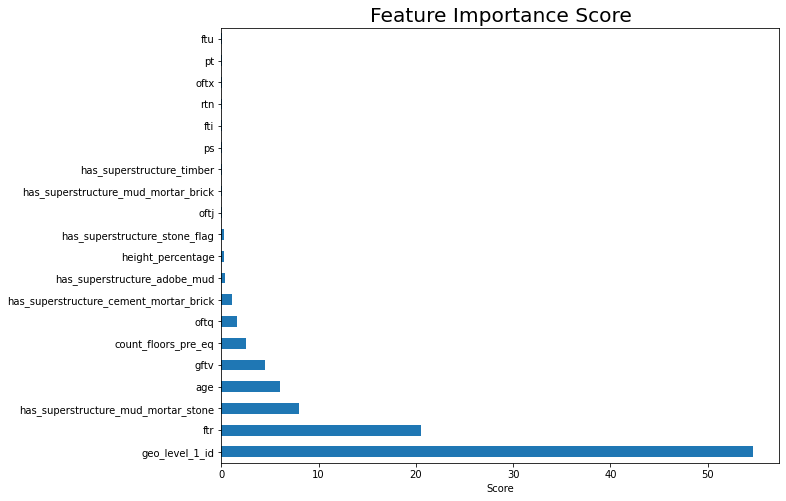

In [ ]:
feat_importances = pd.Series(dc.feature_importances_,index= train_values.columns)
feat_importances = feat_importances.nlargest(20)
plt.figure(figsize=(10,8))
feat_importances.plot(kind='barh')
plt.style.use('fivethirtyeight')
plt.xlabel('Score')
plt.title('Feature Importance Score')
plt.show()

In [ ]:
train_values_important = pd.DataFrame([train_values["geo_level_1_id"], train_values["ftr"], train_values["fth"], train_values["fti"], train_values["ftu"], train_values["ftw"], train_values["has_superstructure_mud_mortar_stone"], train_values["age"], train_values["gftv"], train_values["gftf"], train_values["gftm"], train_values["gftx"], train_values["gftz"], train_values["count_floors_pre_eq"], train_values["oftj"], train_values["oftq"], train_values["ofts"], train_values["oftx"], train_values["has_superstructure_cement_mortar_brick"]]).T
train_values_important.head()

,geo_level_1_id,ftr,fth,fti,ftu,ftw,has_superstructure_mud_mortar_stone,age,gftv,gftf,gftm,gftx,gftz,count_floors_pre_eq,oftj,oftq,ofts,oftx,has_superstructure_cement_mortar_brick
0,6,1,0,0,0,0,1,30,0,1,0,0,0,2,0,1,0,0,0
1,8,1,0,0,0,0,1,10,0,0,0,1,0,2,0,1,0,0,0
2,21,1,0,0,0,0,1,10,0,1,0,0,0,2,0,0,0,1,0
3,22,1,0,0,0,0,1,10,0,1,0,0,0,2,0,0,0,1,0
4,11,1,0,0,0,0,0,30,0,1,0,0,0,3,0,0,0,1,0


In [ ]:
X_train, X_test, y_train,y_test = train_test_split(train_values_important,train_labels["damage_grade"],test_size=0.3)

In [ ]:
dc= CatBoostClassifier(learning_rate=0.001, eval_metric="AUC")

dc=dc.fit(X_train,y_train, eval_set=[(X_test,y_test)],sample_weight=classes_weights)

0:	test: 0.7687583	best: 0.7687583 (0)	total: 91ms	remaining: 1m 30s
1:	test: 0.7706046	best: 0.7706046 (1)	total: 185ms	remaining: 1m 32s
2:	test: 0.7705821	best: 0.7706046 (1)	total: 274ms	remaining: 1m 31s
3:	test: 0.7764649	best: 0.7764649 (3)	total: 377ms	remaining: 1m 33s
4:	test: 0.7764218	best: 0.7764649 (3)	total: 472ms	remaining: 1m 33s
5:	test: 0.7766337	best: 0.7766337 (5)	total: 567ms	remaining: 1m 33s
6:	test: 0.7807293	best: 0.7807293 (6)	total: 678ms	remaining: 1m 36s
7:	test: 0.7804288	best: 0.7807293 (6)	total: 772ms	remaining: 1m 35s
8:	test: 0.7813108	best: 0.7813108 (8)	total: 863ms	remaining: 1m 35s
9:	test: 0.7837062	best: 0.7837062 (9)	total: 966ms	remaining: 1m 35s
10:	test: 0.7832903	best: 0.7837062 (9)	total: 1.06s	remaining: 1m 35s
11:	test: 0.7839837	best: 0.7839837 (11)	total: 1.15s	remaining: 1m 34s
12:	test: 0.7859072	best: 0.7859072 (12)	total: 1.25s	remaining: 1m 34s
13:	test: 0.7855208	best: 0.7859072 (12)	total: 1.35s	remaining: 1m 34s
14:	test: 0.78

In [ ]:
y_pred = dc.predict(test_values)

In [ ]:
submission['damage_grade'] = y_pred
submission.head()

,building_id,damage_grade
0,300051,3
1,99355,2
2,890251,2
3,745817,2
4,421793,3


In [ ]:
submission.to_csv('result_mlp.csv', index=False)

In [ ]:
print(dc.feature_importances_)
X_train.head()


[6.17444040e+01 1.48472715e+01 0.00000000e+00 1.47331444e+00
 7.61498680e-02 0.00000000e+00 6.05113076e+00 2.87899245e+00
 7.65726475e+00 9.38512835e-02 0.00000000e+00 7.88102656e-04
 0.00000000e+00 2.28173804e+00 9.86051443e-02 1.42443967e+00
 3.67010965e-02 2.20440484e-02 1.31330484e+00]


,geo_level_1_id,ftr,fth,fti,ftu,ftw,has_superstructure_mud_mortar_stone,age,gftv,gftf,gftm,gftx,gftz,count_floors_pre_eq,oftj,oftq,ofts,oftx,has_superstructure_cement_mortar_brick
23348,10,1,0,0,0,0,1,10,0,0,0,1,0,2,0,1,0,0,0
172971,10,1,0,0,0,0,1,15,0,1,0,0,0,2,0,1,0,0,0
115263,16,1,0,0,0,0,1,10,0,1,0,0,0,2,0,1,0,0,0
205941,21,1,0,0,0,0,1,20,0,1,0,0,0,3,0,1,0,0,0
63735,6,1,0,0,0,0,1,15,0,1,0,0,0,2,0,1,0,0,0


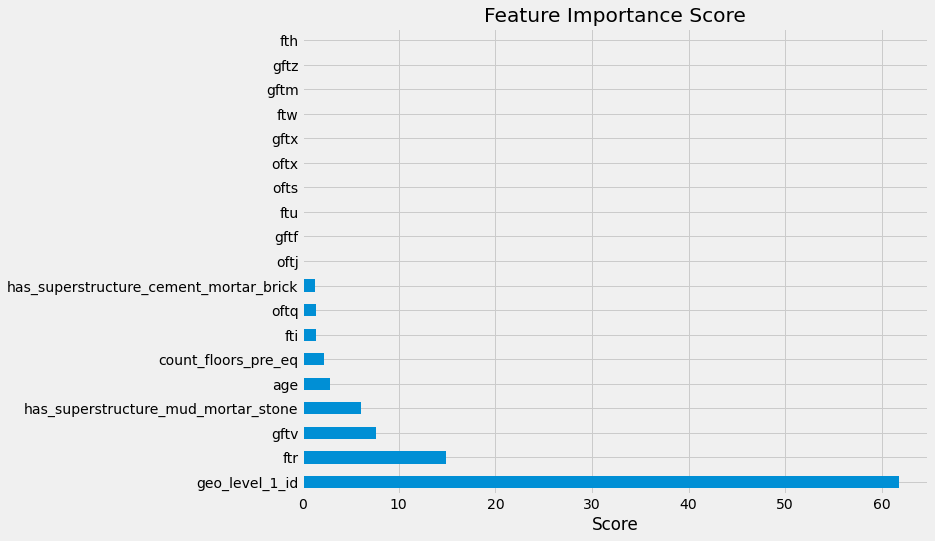

In [ ]:
feat_importances = pd.Series(dc.feature_importances_,index= train_values_important.columns)
feat_importances = feat_importances.nlargest(20)
plt.figure(figsize=(10,8))
feat_importances.plot(kind='barh')
plt.style.use('fivethirtyeight')
plt.xlabel('Score')
plt.title('Feature Importance Score')
plt.show()

In [ ]:
from sklearn.metrics import f1_score

y_train_predict = dc.predict(X_train)

print(f1_score(y_train,y_train_predict,average="micro"))

0.6435643021598509
